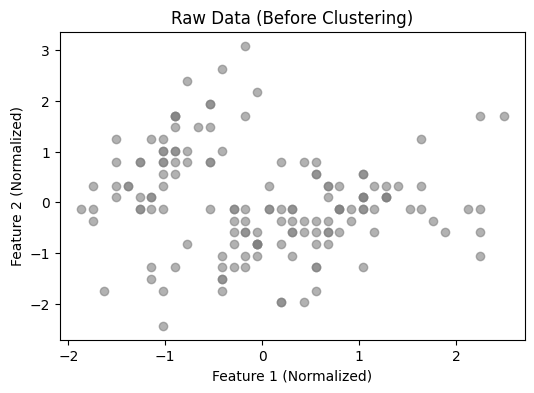

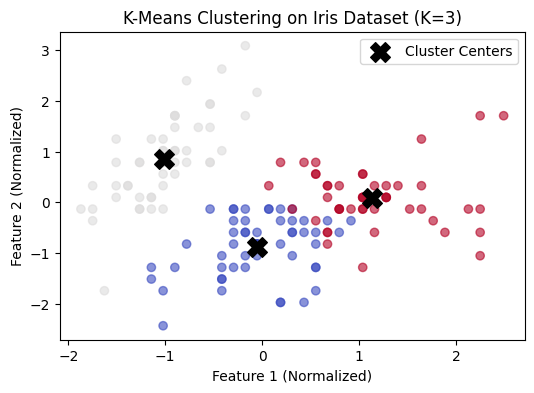

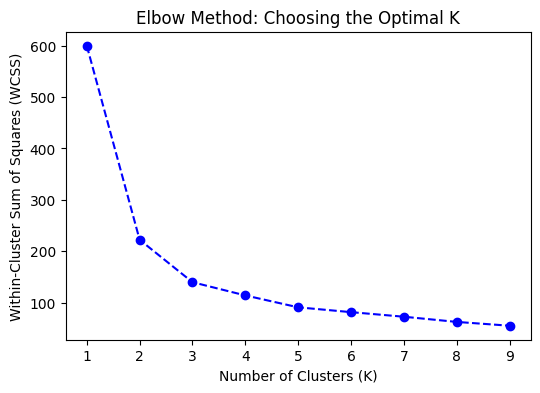

In [1]:
# step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# step 2: Load the Iris Dataset 
iris = load_iris()
data = iris.data  # Extracting numerical features for clustering

#  Step 3: Normalize the Dataset
scaler = StandardScaler()  
normalized_data = scaler.fit_transform(data)  # Standardizing features for fair distance calculations

#  Step 4: Visualizing Raw Data 
plt.figure(figsize=(6, 4))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], color='gray', alpha=0.6)
plt.title("Raw Data (Before Clustering)")
plt.xlabel("Feature 1 (Normalized)")
plt.ylabel("Feature 2 (Normalized)")
plt.show()

#  Step 5: Apply K-Means Clustering
num_clusters = 3  # Number of clusters (since we know Iris has 3 species)
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans_model.fit(normalized_data)  # Train the model

#  Step 6: Get Cluster Labels & Centroids
cluster_labels = kmeans_model.labels_  # Each data point is assigned to a cluster
centroids = kmeans_model.cluster_centers_  # Find the central point of each cluster

#  Step 7: Visualizing the Clustered Data
plt.figure(figsize=(6, 4))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=cluster_labels, cmap='coolwarm', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, c="black", label="Cluster Centers")
plt.title("K-Means Clustering on Iris Dataset (K=3)")
plt.xlabel("Feature 1 (Normalized)")
plt.ylabel("Feature 2 (Normalized)")
plt.legend()
plt.show()

#  Step 8: Using the Elbow Method to Find the Best K
inertia_scores = []  # Stores the Within-Cluster Sum of Squares (WCSS)

for k in range(1, 10):  
    temp_kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    temp_kmeans.fit(normalized_data)
    inertia_scores.append(temp_kmeans.inertia_)  # Store WCSS for each K

#  Step 9: Plot the Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, 10), inertia_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method: Choosing the Optimal K')
plt.show()